In [2]:
import pickle
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme()
sns.set_style("darkgrid")
# sns.set_context("paper")
# sns.set_context("talk")

In [3]:
with open('../../results/corr_results_mlp.P', 'rb') as f:
    mlp_results = pickle.load(f)

with open('../../results/corr_results_rnn.P', 'rb') as f:
    rnn_results = pickle.load(f)


In [4]:
corr_results_mlp =  mlp_results['corr_results']
corr_results_rnn =  rnn_results['corr_results']

runs, checkpoints:  20 21


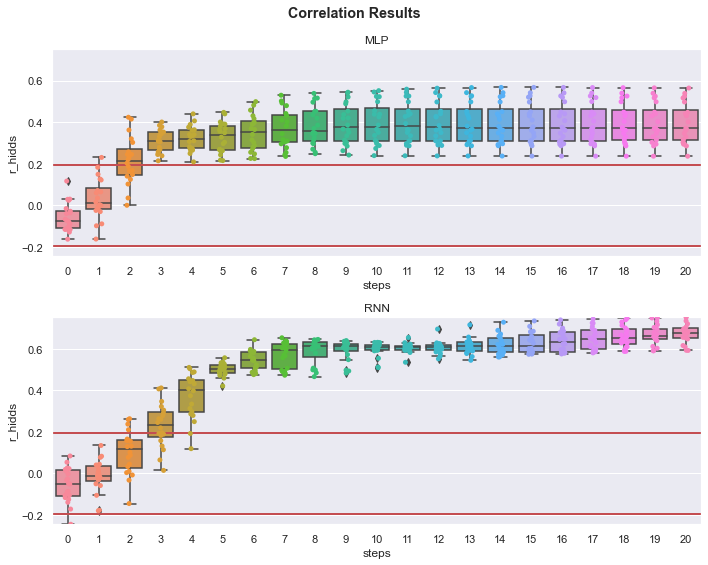

In [5]:
# MLP
r_hidds_mlp = corr_results_mlp['r_hidds']
# RNN
r_hidds_rnn = corr_results_rnn['r_hidds']

mi = min(min(np.min(r_hidds_mlp, axis=0)), min(np.min(r_hidds_rnn, axis=0)))
mx = max(max(np.max(r_hidds_mlp, axis=0)), max(np.max(r_hidds_rnn, axis=0)))

runs = r_hidds_mlp.shape[0]
checkpoints = r_hidds_mlp.shape[1]
print('runs, checkpoints: ', runs, checkpoints)

fig, axs = plt.subplots(2, 1, figsize=(10,8))
val_name = 'r_hidds'
threshold = 0.195
# MLP
val = r_hidds_mlp
df = pd.DataFrame(val, columns= np.arange(checkpoints))
df.insert(0, 'runs', np.arange(runs))
df2 = pd.melt(df, id_vars=['runs'],var_name='steps', value_name=val_name)
# plot
ax = axs[0]
ax = sns.boxplot(x='steps', y=val_name, data=df2, ax=ax)
ax = sns.stripplot(x='steps', y=val_name, data=df2, ax=ax)
ax.set_title('MLP')

# RNN
val = r_hidds_rnn
df = pd.DataFrame(val, columns= np.arange(checkpoints))
df.insert(0, 'runs', np.arange(runs))
df2 = pd.melt(df, id_vars=['runs'],var_name='steps', value_name=val_name)
# plot
ax = axs[1]
ax = sns.boxplot(x='steps', y=val_name, data=df2, ax=ax)
ax = sns.stripplot(x='steps', y=val_name, data=df2, ax=ax)
ax.set_title('RNN')

for ax in axs:
    ax.axhline(y=threshold, color='r', linewidth=2)
    ax.axhline(y=-1*threshold, color='r', linewidth=2)
    ax.set_ylim([mi,mx])

fig.suptitle('Correlation Results', fontweight='bold')
plt.tight_layout()
fig_str = 'corr_results_both_models_hidds'
fig.savefig(('../../figures/' + fig_str + '.pdf'), 
        bbox_inches = 'tight', pad_inches = 0)


